# Traitement d'un nouveau corpus

Dans cet exercice bonus, nous allons experimenter la situation où on 



In [10]:
!wget -q "https://api.nakala.fr/data/10.34847/nkl.81dd2m69/bfaa7213684a2ca04477f97f2ea7cbeb886808a2" -O "carrieres_de_belleville.csv"

# Création d'annotations & entrainement d'un modèle

## Installation & lancement de Label-Studio

#### 🚧 Exécutez la cellule suivante pour installer Label-Studio

In [5]:
# On installe LabelStudio livré sous forme de paquet Python, mais d'autres modes sont possibles (Docker, comme paquet APT pour Debian/Ubuntu, etc.) 
# Voir https://labelstud.io/guide/install.html
%pip install -q label-studio

Note: you may need to restart the kernel to use updated packages.


Il ne reste plus qu'à démarrer Label-Studio en exécutant la cellule un peu plus bas, marquée du symbole ▶️.

🔑 La commande de lancement crée un utilisateur par défaut que vous pourrez utiliser pour vous identifier. 

Ces informations sont :

La cellule suivante restera active tant que Label-Studio sera en cours d'exécution, mais ce n'est pas gênant : vous pourrez tout de même exécuter les cellules suivantes ! 

Une fois l'application démarrée, Label-Studio sera accessible par défaut en local sur le port réseau `8080` et un onglet devrait être créé automatiquement sur votre navigateur. Si ce n'est pas le cas, cliquez sur le lien suivant pour ouvrir un onglet à l'URL `http://localhost:8080`.

[![](https://img.shields.io/badge/Cliquez_ici_pour_ouvrir_Label_Studio_après_avoir_exécuté_la_cellule-green)](http://localhost:8080)

#### 🚧 ▶️ Exécuter la cellule suivante pour démarrer Label-Studio !

In [36]:
# ~~ ATTENTION ~~ 
# Si au lancement de label-studio vous rentontrez l'erreur
# > AttributeError: module 'attr' has no attribute 's'
# Alors décommentez la première ligne relancez la cellule
%pip uninstall -yq attr # Ne pas tenir compte de cette ligne si vous n'avez pas d'erreur

# On lance LabelStudio 
# Cf. https://labelstud.io/guide/start
!label-studio start -b \
    --username tnah_atelierpython@chartes.psl.eu  \
    --password tnah_atelierpython@chartes.psl.eu

# ℹ️ label-studio imprime beaucoup de choses sur la console et cela peut gêner la lecture du botebook.
# Pour cacher la sortie de la cellule, cliquez sur le texte imprimé ci-dessous et appuyez sur la touche 'o'.

Note: you may need to restart the kernel to use updated packages.
^C
Traceback (most recent call last):
  File "/home/bdumenieu/tnah_atelierpython/.venv/bin/label-studio", line 5, in <module>
    from label_studio.server import main
  File "/home/bdumenieu/tnah_atelierpython/.venv/lib/python3.10/site-packages/label_studio/server.py", line 18, in <module>
    from label_studio.core.utils.windows_sqlite_fix import windows_dll_fix
  File "/home/bdumenieu/tnah_atelierpython/.venv/lib/python3.10/site-packages/label_studio/core/utils/windows_sqlite_fix/__init__.py", line 9, in <module>
    from label_studio.core.settings.base import VERIFY_SSL_CERTS, WINDOWS_SQLITE_BINARY_HOST_PREFIX
  File "/home/bdumenieu/tnah_atelierpython/.venv/lib/python3.10/site-packages/label_studio/core/settings/base.py", line 77, in <module>
    from label_studio.core.utils.io import get_data_dir
  File "/home/bdumenieu/tnah_atelierpython/.venv/lib/python3.10/site-packages/label_studio/core/utils/io.py", line 13, in

## Annotation

Une fois loggé(e)s, l'étape suivante consiste à créer un nouveau projet d'annotation.

Comme il n'y en a encore aucun, Label-Studio vous proposera d'en créer un nouveau en cliquant sur le bouton central `Create Project` qui devrait s'afficher sous le dessin de la mascotte Heidi (Oui, c'est bien un oppossum. Pourquoi un oppossum ? [C'est compliqué...](https://labelstud.io/blog/what-s-with-the-label-studio-opossums/)).
 
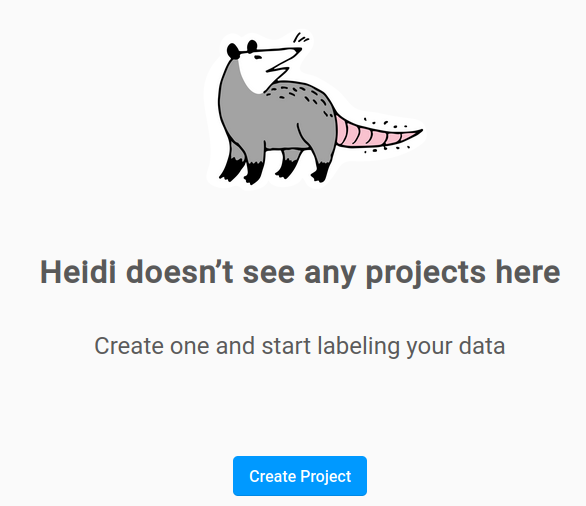

#### 🚧 Suivez les étapes suivantes pour préparer le projet

Cela ouvrira la fenêtre de création d'un nouveau projet avec 3 onglets :
1. Project Name.
2. Data Import 
3. Labeling Setup

**Project Name**

Dans l'onglet "Project Name" seul le nom de projet est obligatoire; vous pouvez par exemple le nommer `"NER Carrières de Belleville"`.

**Data Import**

L'onglet "Data Import" permet de charger un ensemble de taches d'annotations à partir d'un URL ou d'un fichier.

Utilisez le bouton *Upload Files* pour charger le fichier de données CSV `"data/carrieres_de_belleville.csv"` téléchargé précédemment.

Il vous sera demandé si le CSV contient une liste de taches, un seul texte ou bien une série temporelle.
On souhaite que chaque ligne du CSV soit traité comme une tache d'annotation, c'est donc une liste de taches.


**Labeling Setup**

L'interface d'annotation de Label-Studio peut être configurée à l'aide de patrons (*templates*) écrits en XML. 
Plusieurs sont proposés par défaut, et dans notre cas nous allons choisir le patron *Named Entity Recognition* dans la catégorie *Natural Language Processing*.

Vous aurez alors la possibilité de modifier graphiquement les classes d'entités nommées à annoter, appelées *labels*.

Modifiez la liste des labels pour avoir les trois labels suivants :
| Label  | Description  | Exemple  |
|:---:|:---|:---|
| <span style="background-color: #ff6542; font-weight:normal; padding: 0 5px 0 5px; color:black;">PER</span> | Mention d'une personne physique avec un nom propre.  | ledit <span style="background-color: #ff6542; font-weight:normal; padding: 0 5px 0 5px; color:black;">Joseph Rousseau</span> |
| <span style="background-color: #e8d31a; font-weight:normal; padding: 0 5px 0 5px; color:black;">LOC</span> | Désignation d'un lieu par un nom propre, éventuellement avec une suite de références spatiales | au lieu dit <span style="background-color: #e8d31a; font-weight:normal; padding: 0 5px 0 5px; color:black;">la Voirie, paroisse Saint-Laurent</span> |
| <span style="background-color: #59d600; font-weight:normal; padding: 0 5px 0 5px; color:black;">ACT</span> | Activité professionelle d'un individu, indiquée après son nom. | Joseph Rousseau, <span style="background-color: #59d600; font-weight:normal; padding: 0 5px 0 5px; color:black;">maître maçon</span> |


Note : voici un exemple de texte avec une annotation possible.  [Note sur le choix de règles d'annotation: importance de bien définir ce qui est attendu en sortie et d'avoir des règles d'annotation les plus simples et explicites possibles lorsqu'il y a annotation collaborative afin que les données créées soient homogènes. Le risque est sinon que le modèle ne parviennent pas à apprendre correctement à partir du dataset, ou pire qu'il apprenne des choses différentes de ce qu'on voulait à la base.] 

Une fois les bons labels configurés, vous pouvez finaliser la création du projet en cliquant sur le bouton **Save**.

Les taches sont toutes listées dans un grand tableau :

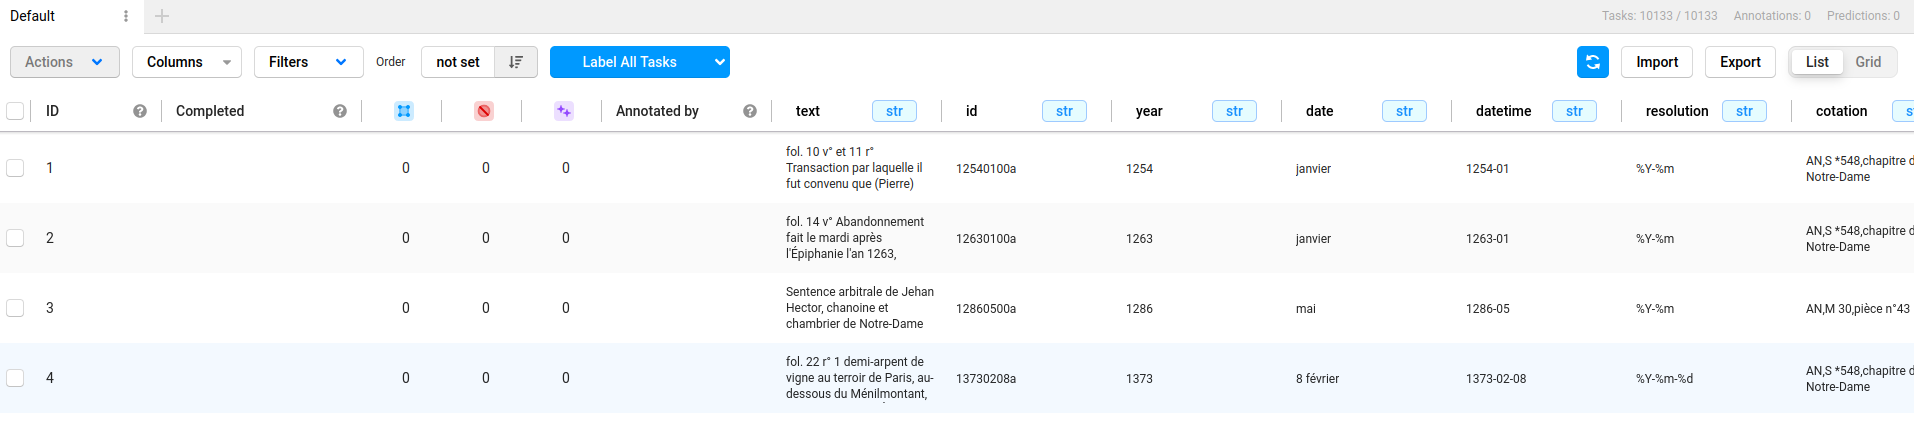

Cliquer sur "Label all tasks" pour ouvrir une première tache d'annotation, vous permettant de choisir un label (en cliquant dessus ou en utilisant les touches 1,2,3...), puis d'annoter en **surlignant** le texte.

Une fois la tache d'annotation terminée, cliquez sur **Submit** pour passer à la suivante.

Voici par exemple une annotation possible de la première entrée du jeu de données :

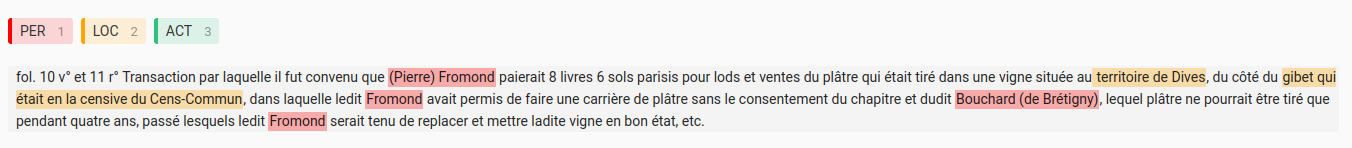

Annotez des actes jusqu'à avoir annoté au moins 30 entités nommées de type PER et LOC, et 15 entités de type ACT. Le nombre d'actes nécessaires pour atteindre ce but dépendra de leur longueur.

**Bonne chance et bon courage ! 🫡**

## Export des données annotées et transformation au format Spacy

#### 🚧 Suivez les étapes suivantes pour exporter les données annotées

1. Revenez à la racine du projet d'annotation, où sont listées toutes les taches d'annotation.

2. Cliquez en haut à droite de la table sur le bouton `Export`, et exportez les annotations au format `CONLL2003`.

3. Déplacez le fichier téléchargé dans votre dossier de travail, et renommez le `carrieres_de_belleville.conll`


Le fichier `carrieres_de_belleville.conll` est un fichier texte dans le format [CONLL](https://medium.com/analytics-vidhya/ner-tensorflow-2-2-0-9f10dcf5a0a), où chaque ligne contient un mot et son label.

SpaCy n'utilise pas ce format textuel pour stocker les documents annotés, nous avons donc besoin de convertir le fichier au format binaire de SpaCy (`.spacy`).  

Cela nécessite d'adapter un peu, manuellement, le fichier `.conll`.

#### 🚧 Réalisez les deux étapes suivante pour adapter le fichier carrieres_de_belleville.conll

1. Ouvrez `carrieres_de_belleville.conll` dans un éditeur de texte quelconque, et à l'aide de l'outil Rechercher+Remplacer (généralement CTRL+H), appliquez le remplacement suivant pour toutes les occurences : 


1. Dans le même éditeur de texte, appliquez la règle de remplacement suivante..
⚠️ Il vous faudra signaler que le remplacement utiliser une **expression régulière**

Une fois ces adaptations faites, on peut utiliser l'outil `convert` de la CLI SpaCy pour transformer le fichier `.conll` en fichier `.spacy`

#### 🚧 Exécutez la cellule suivante pour réaliser la conversion

⚠️ Vous aurez besoin de SpaCy en local sur votre machine. Si SpaCy n'est pas installée :
```python
pip install -q spacy
```

⚠️  Pensez également à stopper l'exécution de la cellule ayant démarré Label-Studio pour pouvoir exécuter la cellule ci-dessous.

In [38]:
!spacy convert carrieres_de_belleville.conll -c conll .

⚠ Document delimiters found, automatic document segmentation with `-n`
disabled.
✔ Generated output file (3 documents):
carrieres_de_belleville.spacy


## Génération des fichiers TRAIN et TEST

Afin de *fine-tuner* notre modèle pour améliorer ses performances sur les textes des carrières de Belleville, il faut diviser le jeu de données .spacy créé en deux sous-ensembles :
- un fichier `train_belleville.spacy` contenant 70% des données annotées, sélectionnées aléatoirement
- un fichier `test_belleville.spacy` contenant 30% des données annotées, également sélectionnées aléatoirement

#### 🚧 Exécutez les deux cellules suivantes pour créer les jeux de données TRAIN et TEST

Cela créera deux nouveaux fichiers dans le dossier du notebook :
- `train_carrieres_de_belleville.spacy`, contenant 70% des textes annotés
- `test_carrieres_de_belleville.spacy`, contenant 30% des textes annotés

In [63]:
import spacy
from spacy.tokens import DocBin
import random

# On charge le modèle français "blank" de spaCy qui contient seulement le tokenizer
# Il va servir à lire le contenu du fichier carrieres_de_belleville.spacy
nlp = spacy.blank("fr")

# Charger les données dans un objet Doc
docs = DocBin().from_disk("./carrieres_de_belleville.spacy")

# On récupère tous les documents, on les mélange et on les stocke dans une liste
all_docs = list(docs.get_docs(nlp.vocab))
random.Random(42).shuffle(all_docs)

# On divise les données en deux groupes :
# - un pour l'entraînement qui contiendra 70% des données et
# - un pour le test qui contiendra 30% des données
train_test_ratio = 0.7
train_data = all_docs[: int(len(all_docs) * train_test_ratio)]
test_data = all_docs[int(len(all_docs) * train_test_ratio) :]

print(
    "Nombre de documents pour l'entraînement : {n}, soit {r:.2f}%".format(
        n=len(train_data), r=len(train_data) / len(all_docs) * 100
    )
)
print(
    "Nombre de documents pour le test : {n}, soit {r:.2f}%".format(
        n=len(test_data), r=len(test_data) / len(all_docs) * 100
    )
)

# On exporte les données d'entraînement et de test dans des fichiers .spacy
DocBin(docs=train_data).to_disk("./train_carrieres_de_belleville.spacy")
DocBin(docs=test_data).to_disk("./test_carrieres_de_belleville.spacy")

Nombre de documents pour l'entraînement : 2, soit 66.67%
Nombre de documents pour le test : 1, soit 33.33%


## *Fine-tuning* sur les données annotées

À partir d'ici, on modifiera le notebook `intro-ner-spacy-student.ipynb` sur Google Colab pour ne pas avoir à tout reprendre depuis le début.

#### 🚧 Transférez les nouveaux fichiers TRAIN et TEST dans Google Drive

La première chose à faire est de verser les deux fichiers `train_carrieres_de_belleville.spacy`et `test_carrieres_de_belleville.spacy` dans le dossier `dataset/̀  de votre espace Google Drive, que vous aviez créé lors de la dernière séance.


Avant d'entrainer de nouveau notre modèle, commençons par mesurer ses performances **sans** *fine-tuning* sur le jeu de test des carrières de Belleville.

#### 🚧 Modifiez le notebook sur Google Colab
1. Dans la première cellule de la section 7.1, changez le jeu de test pour :
```python
test_set = DocBin().from_disk("./dataset/carrieres_de_belleville.spacy")
```
2. Exécutez la cellule modifiée ainsi que les cellules suivantes pour afficher les scores d'évaluation du modèle sur les textes du jeu de test.

Et maintenant, entrainons de nouveau le modèle de base sur les textes que vous avez annoté !

#### 🚧 Modifiez le notebook sur Google Colab
1. Modifiez la cellule de la section 7.2, paragraphe "🚧 Lancer l'entraînement" pour que le modèle soit maintenant entrainé et testé à partir de vos deux jeux de données `train/test_carrieres_de_belleville.spacy`.
2. Enfin, exécutez de nouveau la section 7.3 pour évaluer les performances du modèle réentrainé sur le jeu de données de test.

Les résultats sont-ils meilleurs une fois le modèle spécialisé ?


## 🏁 C'est tout pour cette fois !

Nous espérons que cette activité a été enrichissante.

N'hésitez pas à **donner rapidement votre avis anonyme 📢** via [ce **formulaire** 📝](https://forms.gle/BnPCm7CRhmhDJzHo7) pour nous aider à l'améliorer.

